In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
        
import panel as pn
import altair as alt
from altair import datum
import pandas as pd
import datetime as dt

import panel as pn
import pandas as pd
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# from bokeh.sampledata import stocks

pn.extension('plotly')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train=pd.read_csv('/kaggle/input/elly-lilly-ml-case-study/Data_Train.csv')
test=pd.read_csv('/kaggle/input/elly-lilly-ml-case-study/Data_Test.csv')

test = test.melt(id_vars=["Year"], 
        var_name="Country", 
        value_name="GDP")
train = train.melt(id_vars=["Year"], 
        var_name="Country", 
        value_name="GDP")

train['Year']=pd.to_datetime(train['Year'],infer_datetime_format=True,format='%Y')

In [3]:
train['Country'].unique()

array(['Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Caribbean small states', 'Central African Republic',
       'Central Europe and the Baltics', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Ecuador',
  

In [4]:
train

,Year,Country,GDP
0,1960-01-01,Albania,NaN
1,1961-01-01,Albania,NaN
2,1962-01-01,Albania,NaN
3,1963-01-01,Albania,NaN
4,1964-01-01,Albania,NaN
...,...,...,...
12755,2010-01-01,Zimbabwe,1.204166e+10
12756,2011-01-01,Zimbabwe,1.410192e+10
12757,2012-01-01,Zimbabwe,1.711485e+10
12758,2013-01-01,Zimbabwe,1.909102e+10


In [5]:
import seaborn as sns
import plotly.express as px
# plt.figure(figsize=(40,20))
# sns.lineplot(x='Year',y='GDP',hue='Country',data=train)


# for k in ['Albania','Zimbabwe']:
fig = px.line(train, x="Year", y='GDP',color='Country', template = 'plotly_dark')
fig.show()

# Time Series Analysis
As you all know how important data analysis is for data scientists.It gives us a brief understanding of the data and a very strange but intriguing confidence about our prediction model.Well, Time series analysis is no different.But time series problems have very special orientation when it comes to analysis

* **Trend**:- As the name suggests trend depicts the variation in the output as time increases.It is often non-linear. Sometimes we will refer to trend as “changing direction” when it might go from an increasing trend to a decreasing trend.

* **Level**:- It basically depicts baseline value for the time series.

* **Seasonal**:- As its name depicts it shows the repeated pattern over time. In layman terms, it shows the seasonal variation of data over time.

* **Noise**:- It is basically external noises that vary the data randomly.


In this notebook we will the GDP of 232 Countries (mapped) GDP and compare them and forecast the next 3 Years

## Lets first understand the overall GDP by taking the group by dates and understand the mean of all the countries in picture

In [6]:
all_df = train.groupby('Year').agg({'GDP':['mean','min','max','std','median']}).reset_index()
all_df.columns = ['Year','GDP_Mean','GDP_Min','GDP_Max','GDP_Std','GDP_median']

fig = px.line(all_df, x="Year", y=['GDP_Mean','GDP_Std','GDP_median'], template = 'plotly_dark')
fig.show()

In [7]:
all_df['GDP_log_mean']=np.log1p(all_df['GDP_Mean'])
fig = px.line(all_df, x="Year", y=['GDP_log_mean'], template = 'plotly_dark')
fig.show()

**As we can see here that most of the data is in increasing order, with very high variance and standard deviation, so we will work on the mean of the all the countries to get our one df so that we can perform some tests on it.**

### We will start by taking this as our Main Dataframe and perform some generalized tests on it and take it further for specific countries

In [8]:
all_df = all_df[['Year','GDP_Mean']]

In [9]:
all_df.set_index('Year',inplace=True)

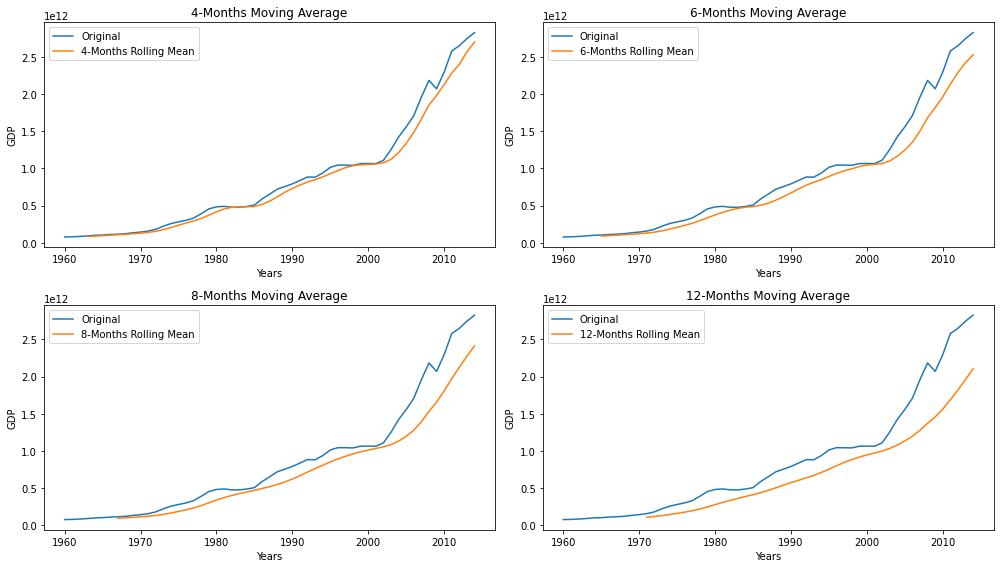

In [10]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline


fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)
axes[0][0].plot(all_df.index, all_df, label='Original')
axes[0][0].plot(all_df.index, all_df.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("GDP")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')
axes[0][1].plot(all_df.index, all_df, label='Original')
axes[0][1].plot(all_df.index, all_df.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("GDP")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')
axes[1][0].plot(all_df.index, all_df, label='Original')
axes[1][0].plot(all_df.index, all_df.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("GDP")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')
axes[1][1].plot(all_df.index, all_df, label='Original')
axes[1][1].plot(all_df.index, all_df.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("GDP")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

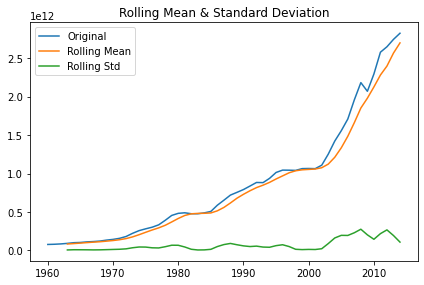

In [11]:
rolmean = all_df.rolling(window = 4).mean()
rolstd = all_df.rolling(window = 4).std()

#Plot rolling statistics:
orig = plt.plot(all_df, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.tight_layout()
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

### Dickey-Fuller Test

**Let's run the Dicky Fuller Test on the timeseries and verify the null hypothesis that the TS is non-stationary.**

The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the presence of serial correlation.

In [12]:
from statsmodels.tsa.stattools import adfuller


dftest = adfuller(all_df)
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is 2.648
DF test p-value is 0.9991


Though the variation in standard deviation is small, rolling mean is clearly increasing with time and this is not a stationary series. Also, the test statistic is way more than the critical values.


### Seasonality – Time Series Decomposition
Observe how number of tractors sold vary on a month on month basis. We will plot a stacked annual plot to observe seasonality in our data.

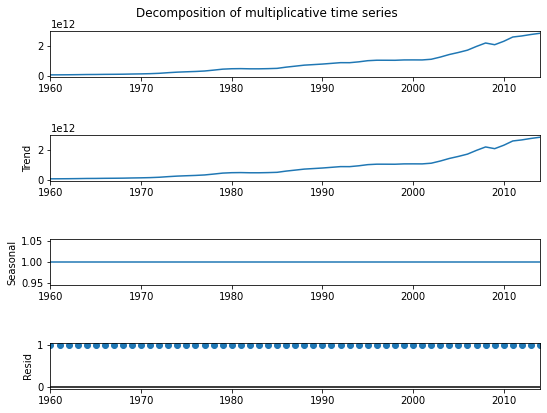

In [13]:
decomposition = sm.tsa.seasonal_decompose(all_df, model='multiplicative')

fig = decomposition.plot()
fig.set_figwidth(8)
fig.set_figheight(6)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

Some of our key observations from this analysis:
* 1) Trend: 12-months moving average looks quite similar to a straight line hence we could have easily used linear regression to estimate the trend in this data.

* 2) Seasonality: Seasonal plot displays a fairly constant month-on-month pattern. The monthly seasonal components are average values for a month after removal of trend. Trend is removed from the time series using the following formula:

Seasonality_t × Remainder_t = Y_t/Trend_t

* 3) Irregular Remainder (random): is the residual left in the series after removal of trend and seasonal components. Remainder is calculated using the following formula:

Remainder_t = Y_t / (Trend_t × Seasonality_t)

Text(0, 0.5, 'Tractor Sales')

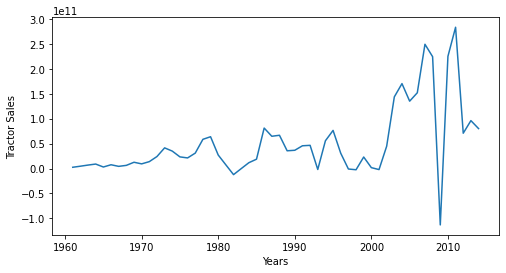

In [14]:
plt.figure(figsize=(8, 4))
plt.plot(all_df.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Tractor Sales')

Text(0, 0.5, 'Log (Tractor Sales)')

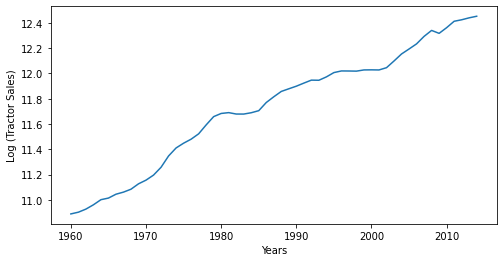

In [15]:
plt.figure(figsize=(8, 4))
plt.plot(np.log10(all_df))
plt.xlabel('Years')
plt.ylabel('Log (Tractor Sales)')

Text(0, 0.5, 'Differenced Log (Tractor Sales)')

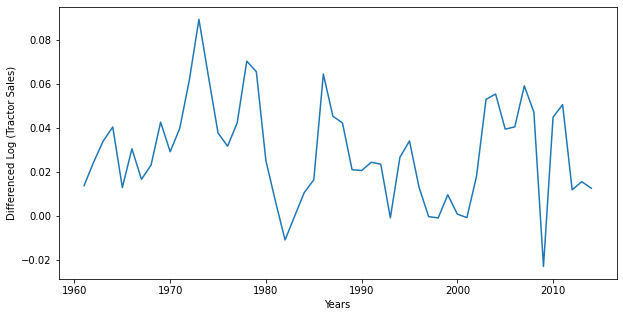

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(all_df).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Tractor Sales)')

this is the best 

In [17]:
all_df_log = np.log10(all_df)
all_df_log.dropna(inplace=True)

all_df_log_diff = all_df_log.diff(periods=1) # same as ts_log_diff = ts_log - ts_log.shift(periods=1)
all_df_log_diff.dropna(inplace=True)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

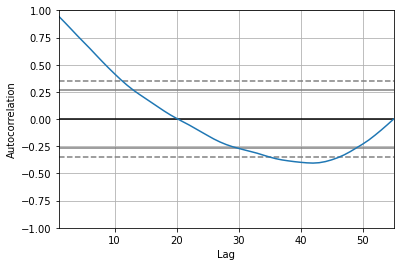

In [18]:
pd.plotting.autocorrelation_plot(all_df_log)

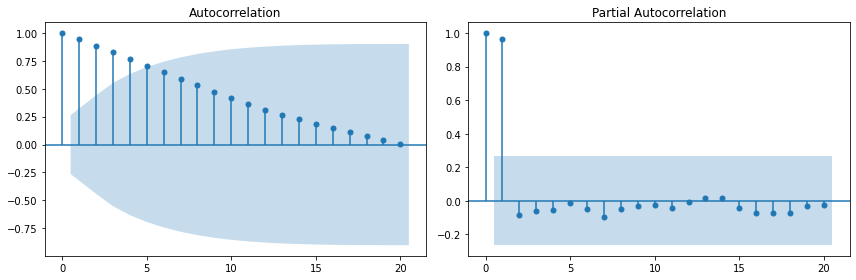

In [19]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(all_df_log, lags=20, ax=axes[0])
smt.graphics.plot_pacf(all_df_log, lags=20, ax=axes[1])
plt.tight_layout()

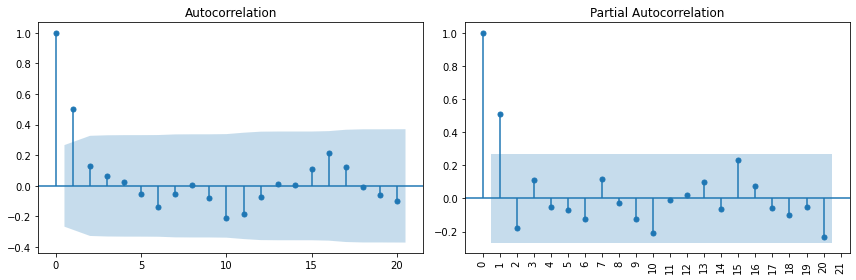

In [20]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
plt.xticks(range(0,30,1), rotation = 90)
smt.graphics.plot_acf(all_df_log_diff, lags=20, ax=axes[0])
smt.graphics.plot_pacf(all_df_log_diff, lags=20, ax=axes[1])
plt.tight_layout()

Nonstationary series have an ACF that remains significant for half a dozen or more lags, rather than quickly declining to zero. You must difference such a series until it is stationary before you can identify the process

The above ACF is “decaying”, or decreasing, very slowly, and remains well above the significance range (blue band) for at least a dozen lags. **This is indicative of a non-stationary series.**

## Intuition for ACF and PACF Plots
Plots of the autocorrelation function and the partial autocorrelation function for a time series tell a very different story.

We can use the intuition for ACF and PACF above to explore some thought experiments.

### Autoregression Intuition
Consider a time series that was generated by an autoregression (AR) process with a lag of k.

We know that the ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information.

This means we would expect the ACF for the AR(k) time series to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect was weakened.

We know that the PACF only describes the direct relationship between an observation and its lag. This would suggest that there would be no correlation for lag values beyond k.

This is exactly the expectation of the ACF and PACF plots for an AR(k) process.

## ARIMA 
is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration.

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

* AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
* I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
* MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.
Each of these components are explicitly specified in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

The parameters of the ARIMA model are defined as follows:

* p: The number of lag observations included in the model, also called the lag order.
* d: The number of times that the raw observations are differenced, also called the degree of differencing.
* q: The size of the moving average window, also called the order of moving average.

In [21]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [22]:
sales_ts =all_df[['GDP_Mean']]

sales_ts_diff   = sales_ts - sales_ts.shift(periods=1)
sales_ts_diff.dropna(inplace=True)

result = adfuller(sales_ts_diff) 

pval              = result[1]
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 

if pval < 0.05:
    print('Data is stationary')
else:
    print('Data after differencing is not stationary; so try log diff')
    sales_ts_log      = np.log10(sales_ts)
    sales_ts_log.dropna(inplace=True)
    sales_ts_log_diff = sales_ts_log.diff(periods=1)
    sales_ts_log_diff.dropna(inplace=True)
    result            = adfuller(sales_ts_log_diff) 

    pval              = result[1]
    print('ADF Statistic: %f' % result[0]) 
    print('p-value: %f' % result[1]) 
    if pval < 0.05:
        print('Data after log differencing is stationary')
    else:
        print('Data after log differencing is not stationary; try second order differencing')
        sales_ts_log_diff2 = sales_ts_log.diff(periods = 2)
        sales_ts_log_diff2.dropna(inplace=True)
        result         =   adfuller(sales_ts_log_diff2) 
        pval              = result[1]
        print('ADF Statistic: %f' % result[0]) 
        print('p-value: %f' % result[1]) 
        if pval < 0.05:
            print('Data after log differencing 2nd order is stationary')
        else:
            print('Data after log differencing 2nd order is not stationary')

ADF Statistic: -1.028592
p-value: 0.742694
Data after differencing is not stationary; so try log diff
ADF Statistic: -4.078807
p-value: 0.001050
Data after log differencing is stationary


In [23]:
# pdq.append((3,1,0))
# pdq.append((4,1,0))
# pdq.append((5,1,0))
# pdq.append((6,1,0))
# pdq

In [24]:
pdq,seasonal_pdq

([(0, 0, 0),
  (0, 0, 1),
  (0, 1, 0),
  (0, 1, 1),
  (1, 0, 0),
  (1, 0, 1),
  (1, 1, 0),
  (1, 1, 1)],
 [(0, 0, 0, 12),
  (0, 0, 1, 12),
  (0, 1, 0, 12),
  (0, 1, 1, 12),
  (1, 0, 0, 12),
  (1, 0, 1, 12),
  (1, 1, 0, 12),
  (1, 1, 1, 12)])

<AxesSubplot:xlabel='Year'>

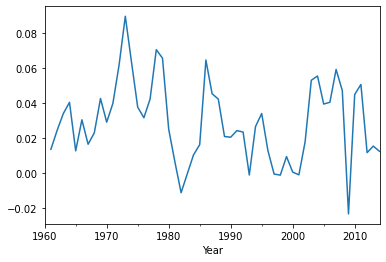

In [25]:
np.log10(all_df['GDP_Mean']).diff().plot()

## We saw that after log and differencing the time series is stationary

In [26]:
#Separate data into train and test
# data['date'] = all_df.index
train = all_df[all_df.index < '2011-01-01']
test = all_df[all_df.index >= '2011-01-01']
train['GDP_Mean'] = np.log10(train['GDP_Mean'])

<AxesSubplot:xlabel='Year'>

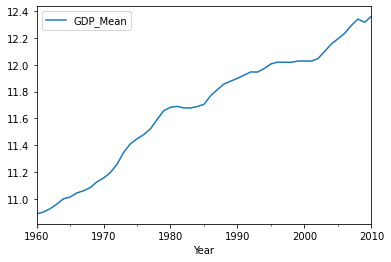

In [27]:
train.plot()

In [28]:
import warnings
warnings.filterwarnings("ignore")

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(train,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True)
            results = temp_model.fit()

            
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 0)x(0, 0, 0, 12)12 model - AIC:-235.92695753564212


### Inference
The best fit model is selected based on Akaike Information Criterion (AIC) , and Bayesian Information Criterion (BIC) values. The idea is to choose a model with minimum AIC and BIC values.
For ARIMA(p, d, q) × (P, D, Q)S, we got SARIMAX(1, 1, 0)x(0, 0, 0, 12)12 model with the least AIC:-235.92695753564212

Here,

* p = non-seasonal AR order = 1,
* d = non-seasonal differencing = 1,
* q = non-seasonal MA order = 0,
* P = seasonal AR order = 0,
* D = seasonal differencing = 0,
* Q = seasonal MA order = 0,
* S = time span of repeating seasonal pattern = 12

In [29]:
best_model = sm.tsa.statespace.SARIMAX(train,
                                      order=(1, 1, 0),
                                      seasonal_order=(0, 0, 0, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

In [30]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:               GDP_Mean   No. Observations:                   51
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 119.963
Date:                Sun, 11 Jul 2021   AIC                           -235.927
Time:                        10:42:52   BIC                           -232.103
Sample:                    01-01-1960   HQIC                          -234.471
                         - 01-01-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8247      0.085      9.740      0.000       0.659       0.991
sigma2         0.0005   7.55e-05      6.248      0.000       0.000       0.001


In [31]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2011-01-01'), dynamic=True, full_results=True)

In [32]:
pred_dynamic_ci = pred_dynamic.conf_int()
pred99 = best_results.get_forecast(steps=4, alpha=0.1)
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy = test.copy()
testCopy['gdp_ts_forecasted'] = np.power(10, pred99.predicted_mean)
# testCopy['gdp_ts_forecasted'] = pred99.predicted_mean
testCopy

,GDP_Mean,gdp_ts_forecasted
Year,,
2011-01-01,2.578392e+12,2.498880e+12
2012-01-01,2.649182e+12,2.680589e+12
2013-01-01,2.745232e+12,2.840350e+12
2014-01-01,2.825324e+12,2.979249e+12


In [33]:
from numba import jit
import math

@jit
def smape_fast(y_true, y_pred):
    out = 0
    for i in range(y_true.shape[0]):
        a = y_true[i]
        b = y_pred[i]
        c = a+b
        if c == 0:
            continue
        out += math.fabs(a - b) / c
    out *= (100.0 / y_true.shape[0])
    return out

In [34]:
testCopy

,GDP_Mean,gdp_ts_forecasted
Year,,
2011-01-01,2.578392e+12,2.498880e+12
2012-01-01,2.649182e+12,2.680589e+12
2013-01-01,2.745232e+12,2.840350e+12
2014-01-01,2.825324e+12,2.979249e+12


In [35]:

print('The SMAPE of our forecasts is {}'.format(smape_fast(testCopy['GDP_Mean'],testCopy['gdp_ts_forecasted'])))

The SMAPE of our forecasts is 0.3915070260816852


## Awesome, its giving somewhat good predictions

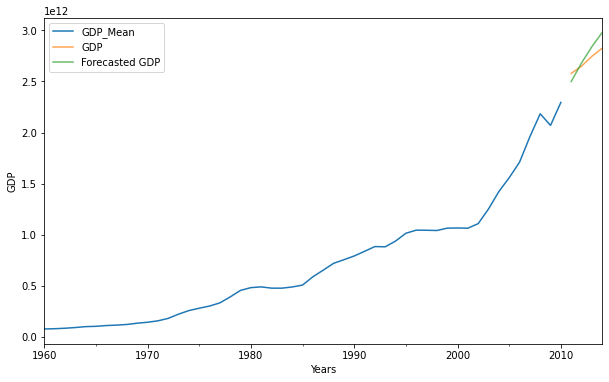

In [36]:
axis = np.power(10,train['GDP_Mean']).plot(label='GDP_Mean', figsize=(10, 6))
testCopy['GDP_Mean'].plot(ax=axis, label='GDP', alpha=0.7)
testCopy['gdp_ts_forecasted'].plot(ax=axis, label='Forecasted GDP', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('GDP')
plt.legend(loc='best')
plt.show()
plt.close()

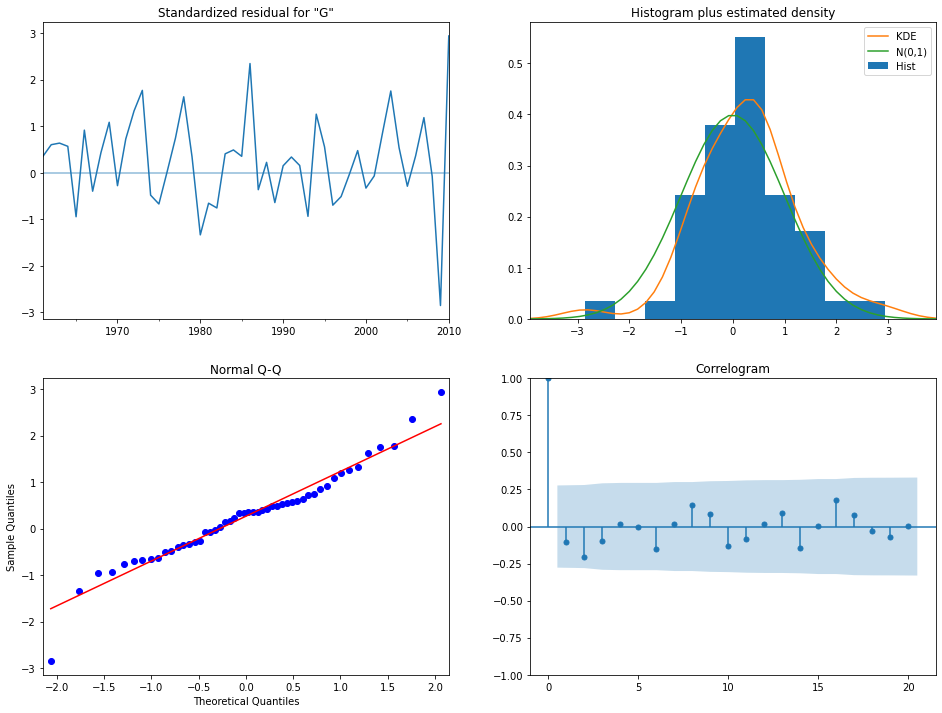

In [37]:
best_results.plot_diagnostics(lags=20, figsize=(16,12))
plt.show()

### Inference
We need to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If it is not that it signifies that the model can be further improved and we repeat the process with the residuals.

In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:

* The KDE plot of the residuals on the top right is almost similar with the normal distribution.
* The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.
* The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

Those observations coupled with the fact that there are no spikes outside the insignificant zone for both ACF and PACF plots lead us to conclude that that residuals are random with no information or juice in them and our model produces a satisfactory fit that could help us understand our time series data and forecast future values. It sems that our ARIMA model is working fine.

In [38]:
train=pd.read_csv('/kaggle/input/elly-lilly-ml-case-study/Data_Train.csv')
test=pd.read_csv('/kaggle/input/elly-lilly-ml-case-study/Data_Test.csv')

test = test.melt(id_vars=["Year"], 
        var_name="Country", 
        value_name="GDP")
train = train.melt(id_vars=["Year"], 
        var_name="Country", 
        value_name="GDP")

train['Year']=pd.to_datetime(train['Year'],infer_datetime_format=True,format='%Y')

In [39]:

def get_Countrydf(country):
    return train[train['Country']==country].copy()





## Checking for specific country

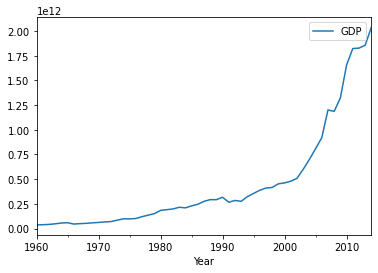

In [40]:

df = get_Countrydf('India')
plt.figsize=(15,8)
df.plot.line(x = 'Year', y = 'GDP')

plt.show()

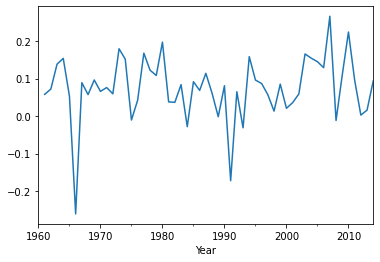

In [41]:
np.log(df.set_index('Year')['GDP']).diff(periods=1).plot()
plt.show()

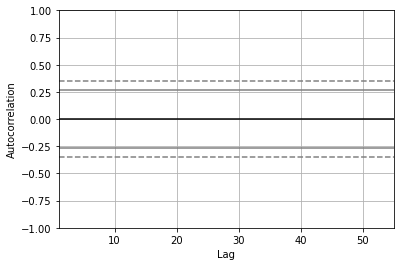

In [42]:
pd.plotting.autocorrelation_plot(np.log(df.set_index('Year')['GDP']).diff(periods=1))
plt.show()

In [43]:
from   statsmodels.tsa.stattools  import  adfuller

df=df.set_index('Year')

## translate and test for stationary

In [44]:



result = adfuller(df[['GDP']]) 

print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 

# This series is not stationary.

ADF Statistic: 4.249148
p-value: 1.000000


In [45]:
xx = np.log(df['GDP']).diff(periods=1)
xx.fillna(0,inplace=True)

In [46]:



result = adfuller(xx) 

print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 

# This series is stationary.

ADF Statistic: -6.846619
p-value: 0.000000


### Validating the hypothesis

In [47]:
sales_ts =df[['GDP']]

sales_ts_diff   = sales_ts - sales_ts.shift(periods=1)
sales_ts_diff.dropna(inplace=True)

result = adfuller(sales_ts_diff) 

pval              = result[1]
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 

if pval < 0.05:
    print('Data is stationary')
else:
    print('Data after differencing is not stationary; so try log diff')
    sales_ts_log      = np.log10(sales_ts)
    sales_ts_log.dropna(inplace=True)
    sales_ts_log_diff = sales_ts_log.diff(periods=1)
    sales_ts_log_diff.dropna(inplace=True)
    result            = adfuller(sales_ts_log_diff) 

    pval              = result[1]
    print('ADF Statistic: %f' % result[0]) 
    print('p-value: %f' % result[1]) 
    if pval < 0.05:
        print('Data after log differencing is stationary')
    else:
        print('Data after log differencing is not stationary; try second order differencing')
        sales_ts_log_diff2 = sales_ts_log.diff(periods = 2)
        sales_ts_log_diff2.dropna(inplace=True)
        result         =   adfuller(sales_ts_log_diff2) 
        pval              = result[1]
        print('ADF Statistic: %f' % result[0]) 
        print('p-value: %f' % result[1]) 
        if pval < 0.05:
            print('Data after log differencing 2nd order is stationary')
        else:
            print('Data after log differencing 2nd order is not stationary')

ADF Statistic: -1.043536
p-value: 0.737056
Data after differencing is not stationary; so try log diff
ADF Statistic: -6.752223
p-value: 0.000000
Data after log differencing is stationary


### Confirming the logic

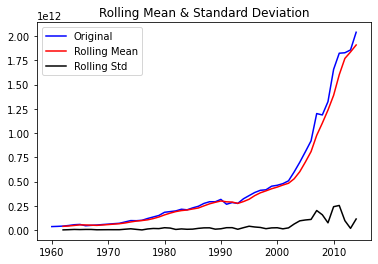

Results of Dickey-Fuller Test:
Test Statistic                  4.249148
p-value                         1.000000
#Lags Used                      2.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


In [48]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=3,center=False).mean() 
    rolstd = timeseries.rolling(window=3,center=False).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(df[['GDP']])

Since the test statistics is more than 5 % critical value and the p-value is larger than 0.05 , the moving average is not constant over time and the null hypothesis of the Dickey-Fuller test cannot be rejected. This shows the weekly time series is not stationary.

As such , we need to transform this series into a stationary time series.

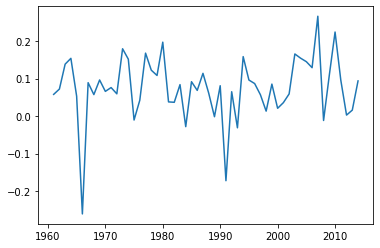

In [49]:
ts_gdp_log = np.log(df[['GDP']])
ts_gdp_log_diff = ts_gdp_log - ts_gdp_log.shift()
plt.plot(ts_gdp_log_diff)

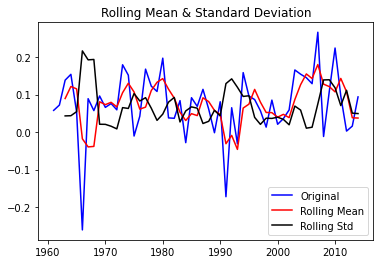

Results of Dickey-Fuller Test:
Test Statistic                -6.752223e+00
p-value                        2.931424e-09
#Lags Used                     0.000000e+00
Number of Observations Used    5.300000e+01
Critical Value (1%)           -3.560242e+00
Critical Value (5%)           -2.917850e+00
Critical Value (10%)          -2.596796e+00
dtype: float64


In [50]:
ts_gdp_log_diff.dropna(inplace=True)
test_stationarity(ts_gdp_log_diff)

### Inference

**The test statistic is less than 1% of the critical value, shows that the time series is stationary with 99% confidence. Now we can apply the statistical models like ARIMA to forecast the future values**

In [51]:

# Applying Seasonal ARIMA model to forcast the data 

mod = sm.tsa.SARIMAX(df['GDP'], trend='n', 
                                      order=(1, 1, 0),
                                      seasonal_order=(0, 0, 0, 12),
                                      enforce_stationarity=True)
results = mod.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                   55
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -1421.208
Date:                Sun, 11 Jul 2021   AIC                           2846.416
Time:                        10:43:04   BIC                           2850.394
Sample:                    01-01-1960   HQIC                          2847.950
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5801      0.063      9.198      0.000       0.456       0.704
sigma2      4.315e+21   2.78e-24   1.55e+45      0.000    4.32e+21    4.32e+21
Ljung-Box (L1) (Q):                   1.17   Jarque-

In [52]:
test

,Year,Country,GDP
0,2015,Albania,1.138693e+10
1,2016,Albania,1.188368e+10
2,2017,Albania,1.303854e+10
3,2015,Algeria,1.659793e+11
4,2016,Algeria,1.601299e+11
...,...,...,...
691,2016,Zambia,2.095475e+10
692,2017,Zambia,2.586814e+10
693,2015,Zimbabwe,1.996312e+10
694,2016,Zimbabwe,2.054868e+10


In [53]:
import random

random.seed(2021)
np.random.seed(2021)

import warnings
warnings.filterwarnings("ignore")

In [54]:
test[test['Country']=='Albania']['GDP'].values.tolist()

[11386931489.7968, 11883682170.8236, 13038538300.2644]

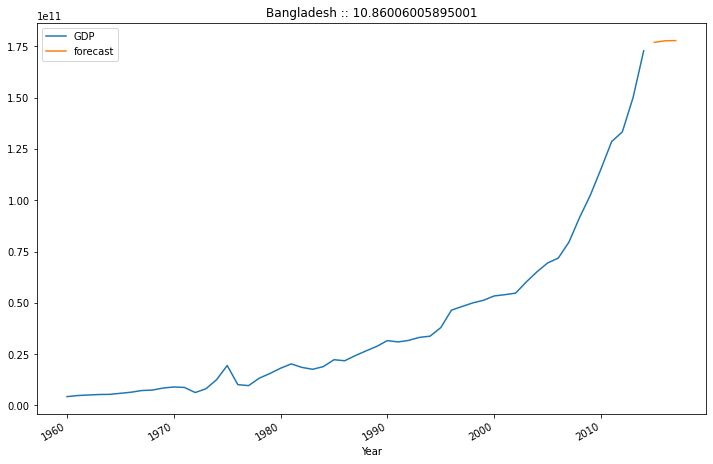

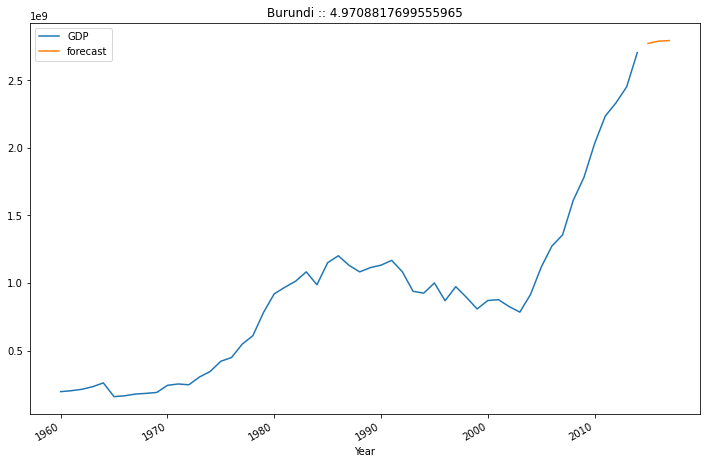

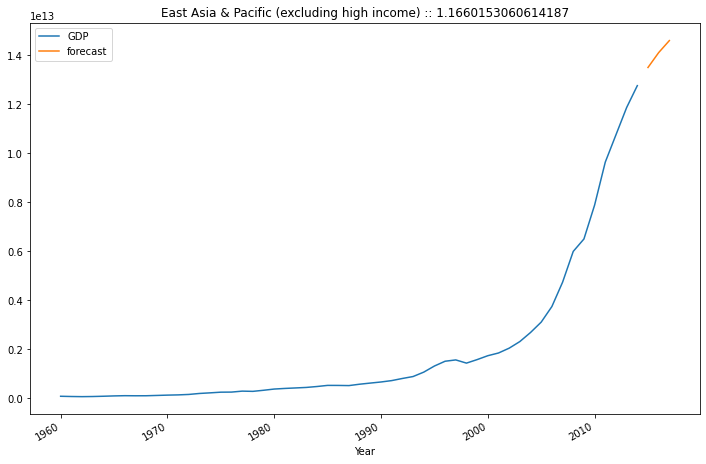

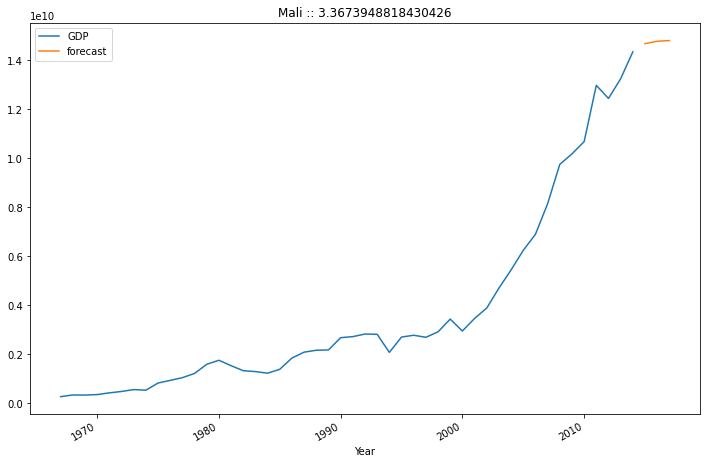

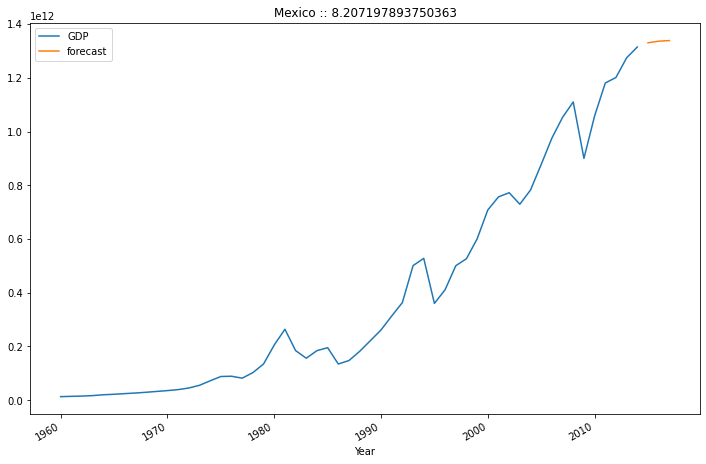

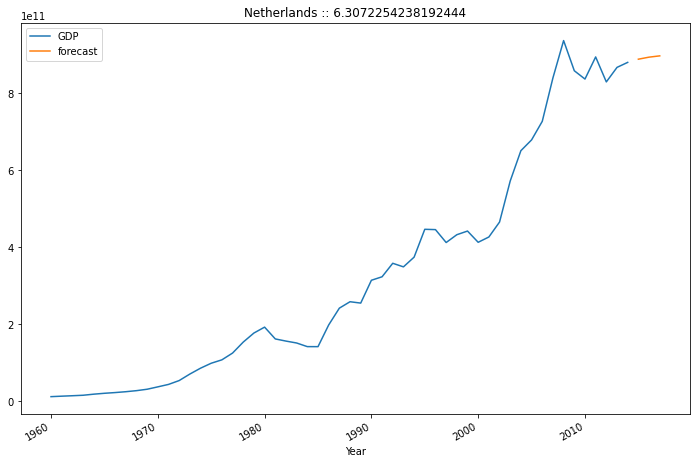

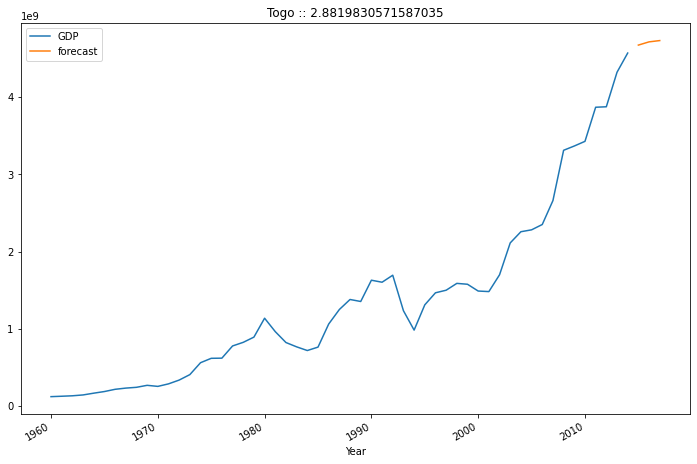

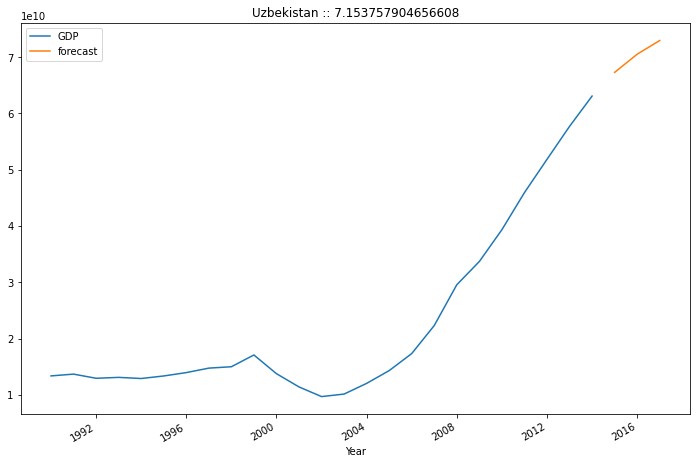

In [55]:

from statsmodels.tsa.arima.model import ARIMA




def get_model(df,model = 'ETS'):
    if model=='ETS':
        model = ETSModel(df['GDP'],trend='add',error="add")
        results = model.fit()
    elif model=='SARIMA':
        mod = sm.tsa.SARIMAX(df['GDP'], trend='n',
                                      order=(1, 1, 0),
                                      seasonal_order=(0, 0, 0, 12),
                                      enforce_stationarity=True)
        results = mod.fit()
    elif model=='ARIMA':
#         print(1)
        mod = ARIMA(df['GDP'], trend='n',
                                      order=(1, 1, 0),
                                      seasonal_order=(0, 0, 0, 12),
                                      enforce_stationarity=True)
        results = mod.fit()
    return results


def forcasting_future_years(results,df, years,country):
    df_perdict = df.reset_index()
    yr = df_perdict['Year']
    yr = yr + pd.DateOffset(years = years)
    future_dates = yr[-years -1:]
    df_perdict = df_perdict.set_index('Year')
    future = pd.DataFrame(index=future_dates, columns= df_perdict.columns)
    df_perdict = pd.concat([df_perdict, future])
    df_perdict['forecast'] = results.predict(start = '2015-01-01', end = '2017-01-01', dynamic= True)
    df_perdict['forecast'] = np.power(10,df_perdict['forecast'])
    df_perdict['GDP'] = np.power(10,df_perdict['GDP'])
    score = smape_fast(test[test['Country']==country]['GDP'].values,df_perdict['forecast'].values[-years:])
    if(random.randint(0,232)%20)==0:
        df_perdict[['GDP', 'forecast']].plot(figsize=(12, 8),title = country+' :: '+ str(score))
        plt.show()
    return df_perdict[-years:],score


forecast_df = pd.DataFrame(columns=['Year','Country','GDP'])
smape_val=[]
for k in train['Country'].unique():
    
    df = get_Countrydf(k)
    df=df.set_index('Year')
#     print(df)
#     break
    # log it
    df['GDP']=np.log10(df['GDP'])
    res = get_model(df,'ARIMA')
    res_df,sc = forcasting_future_years(res,df,3,k)
    smape_val.append(sc)
    res_df['GDP'] = res_df['forecast']
    res_df.drop('forecast',axis=1,inplace=True)
    res_df['Country']=k
    
    forecast_df = forecast_df.append(res_df.reset_index())

In [56]:
train['Country'].unique()
forecast_df

,Year,Country,GDP
0,2015-01-01,Albania,1.337625e+10
1,2016-01-01,Albania,1.342396e+10
2,2017-01-01,Albania,1.343927e+10
0,2015-01-01,Algeria,2.156340e+11
1,2016-01-01,Algeria,2.164481e+11
...,...,...,...
1,2016-01-01,Zambia,2.674794e+10
2,2017-01-01,Zambia,2.671293e+10
0,2015-01-01,Zimbabwe,1.962409e+10
1,2016-01-01,Zimbabwe,1.966457e+10


In [57]:
# df
sum(smape_val)/train['Country'].nunique()

5.8982841519376255

## Score improved from 11 to 5.89

In [58]:
forecast_df

,Year,Country,GDP
0,2015-01-01,Albania,1.337625e+10
1,2016-01-01,Albania,1.342396e+10
2,2017-01-01,Albania,1.343927e+10
0,2015-01-01,Algeria,2.156340e+11
1,2016-01-01,Algeria,2.164481e+11
...,...,...,...
1,2016-01-01,Zambia,2.674794e+10
2,2017-01-01,Zambia,2.671293e+10
0,2015-01-01,Zimbabwe,1.962409e+10
1,2016-01-01,Zimbabwe,1.966457e+10


In [59]:
forecast_df

finaldf = pd.pivot_table(forecast_df, values='GDP', index=['Year'],
                    columns=['Country'])

finaldf.columns.name=None

finaldf.reset_index(inplace=True)


In [60]:
finaldf['Year']=finaldf['Year'].dt.year
finaldf

,Year,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,Aruba,...,Upper middle income,Uruguay,Uzbekistan,Vanuatu,Vietnam,West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
0,2015,1.337625e+10,2.156340e+11,3.396893e+09,1.496141e+11,1.347549e+09,2.930426e+12,5.272102e+11,1.184803e+10,2.709193e+09,...,2.229259e+13,5.714546e+10,6.727562e+10,8.208421e+08,1.915473e+11,1.287809e+10,8.100678e+13,4.444872e+10,2.685024e+10,1.962409e+10
1,2016,1.342396e+10,2.164481e+11,3.427518e+09,1.512614e+11,1.409533e+09,2.942052e+12,5.271786e+11,1.196267e+10,2.760904e+09,...,2.274777e+13,5.711763e+10,7.050120e+10,8.234578e+08,1.933834e+11,1.298771e+10,8.258309e+13,4.496340e+10,2.674794e+10,1.966457e+10
2,2017,1.343927e+10,2.168103e+11,3.447760e+09,1.519493e+11,1.462436e+09,2.948170e+12,5.271797e+11,1.201734e+10,2.805728e+09,...,2.310553e+13,5.710906e+10,7.293589e+10,8.246165e+08,1.940065e+11,1.306140e+10,8.394527e+13,4.517802e+10,2.671293e+10,1.967728e+10


In [61]:
# predicted = forcasting_future_years(results,df,3)
finaldf.to_csv('final_FDP_forecast_arima.csv',index=False)

In [62]:
# predicted['GDP'] = predicted['forecast']
# predicted.drop('forecast',axis=1,inplace=True)

# predicted.reset_index()

In [63]:
# predicted


forecast_pycaret = pd.read_csv('/kaggle/input/multiple-time-series-forecasting-pycaret/final_FDP_forecast.csv')
forecast_pycaret

,Year,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,Aruba,...,Upper middle income,Uruguay,Uzbekistan,Vanuatu,Vietnam,West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
0,2015,1.318320e+10,2.138100e+11,3.350736e+09,1.454586e+11,1.272644e+09,1.797008e+12,3.952041e+11,1.158620e+10,2.644763e+09,...,2.171652e+13,3.533465e+10,6.294741e+10,8.132207e+08,1.857786e+11,1.269031e+10,7.918846e+13,4.313255e+10,2.721771e+10,1.909102e+10
1,2016,1.318320e+10,2.138100e+11,3.350736e+09,1.454586e+11,1.272644e+09,1.838531e+12,4.034428e+11,1.158620e+10,2.644763e+09,...,2.171652e+13,3.609710e+10,6.294741e+10,8.132207e+08,1.857786e+11,1.269031e+10,7.918846e+13,4.313255e+10,2.721771e+10,1.909102e+10
2,2017,1.318320e+10,2.138100e+11,3.350736e+09,1.454586e+11,1.272644e+09,1.880055e+12,4.116804e+11,1.158620e+10,2.644763e+09,...,2.171652e+13,3.685954e+10,6.294741e+10,8.132207e+08,1.857786e+11,1.269031e+10,7.918846e+13,4.313255e+10,2.721771e+10,1.909102e+10


In [64]:
final_sub = forecast_pycaret*0.1+finaldf*0.9

In [65]:
final_sub

,Year,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,Aruba,...,Upper middle income,Uruguay,Uzbekistan,Vanuatu,Vietnam,West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
0,2015.0,1.335694e+10,2.154516e+11,3.392277e+09,1.491985e+11,1.340059e+09,2.817084e+12,5.140096e+11,1.182184e+10,2.702750e+09,...,2.223499e+13,5.496438e+10,6.684280e+10,8.200800e+08,1.909704e+11,1.285931e+10,8.082495e+13,4.431710e+10,2.688698e+10,1.957078e+10
1,2016.0,1.339989e+10,2.161843e+11,3.419840e+09,1.506811e+11,1.395844e+09,2.831700e+12,5.148050e+11,1.192502e+10,2.749290e+09,...,2.264465e+13,5.501557e+10,6.974582e+10,8.224341e+08,1.926229e+11,1.295797e+10,8.224363e+13,4.478032e+10,2.679491e+10,1.960721e+10
2,2017.0,1.341366e+10,2.165103e+11,3.438058e+09,1.513002e+11,1.443457e+09,2.841359e+12,5.156298e+11,1.197423e+10,2.789632e+09,...,2.296663e+13,5.508411e+10,7.193704e+10,8.234769e+08,1.931837e+11,1.302430e+10,8.346959e+13,4.497347e+10,2.676341e+10,1.961865e+10


In [66]:
test=pd.read_csv('/kaggle/input/elly-lilly-ml-case-study/Data_Test.csv')
test

,Year,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,Aruba,...,Upper middle income,Uruguay,Uzbekistan,Vanuatu,Vietnam,West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
0,2015,1.138693e+10,1.659793e+11,2.811489e+09,1.161936e+11,1.359195e+09,2.560754e+12,5.947493e+11,1.055334e+10,2.691620e+09,...,2.021931e+13,5.327430e+10,6.690380e+10,7.379172e+08,1.932411e+11,12673000000,7.491609e+13,4.559357e+10,2.115439e+10,19963120600
1,2016,1.188368e+10,1.601299e+11,2.877312e+09,1.011239e+11,1.464630e+09,2.513936e+12,5.548609e+11,1.054614e+10,2.646927e+09,...,2.012428e+13,5.268761e+10,6.744571e+10,7.879426e+08,2.052762e+11,13425700000,7.599738e+13,3.643665e+10,2.095475e+10,20548678100
2,2017,1.303854e+10,1.675553e+11,3.012914e+09,1.221238e+11,1.510085e+09,2.586311e+12,6.374303e+11,1.153659e+10,2.700559e+09,...,2.218278e+13,5.615697e+10,4.967717e+10,8.628798e+08,2.237799e+11,14498100000,8.073758e+13,3.126768e+10,2.586814e+10,22040902300


In [67]:
countries = train['Country'].unique()

In [68]:
final_score = 0
smape_score = []
countries_with_low = []
for c in countries:
    sc = smape_fast(test[c].values,final_sub[c].values)
    smape_score.append(sc)
    if sc> 7:
        countries_with_low.append(c)
    
final_score = sum(smape_score)/train['Country'].nunique()
final_score

5.868952345180825

In [69]:
final_sub.to_csv('final_submission.csv', index=False)

In [70]:
len(countries_with_low)

64